In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [15]:
df=pd.read_csv('E:/Work/JIIT/sem_6/JIIT-SEM-6/DataMining&WebAlgorithms/LabTest2_Practice/q1.csv');
df.head()
df=pd.DataFrame(df[["x","y"]])
df

,x,y
0,4.090,8.060
1,4.080,10.020
2,4.070,12.010
3,12.510,12.540
4,12.030,12.040
5,11.570,11.520
6,11.090,11.030
7,10.530,10.510
8,10.010,10.010
9,15.520,12.500


C:\Users\Amit\AppData\Local\Temp\ipykernel_17496\3072645664.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Amit\AppData\Local\Temp\ipykernel_17496\3072645664.py:105: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  m.show()
C:\Users\Amit\AppData\Local\Temp\ipykernel_17496\3072645664.py:117: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


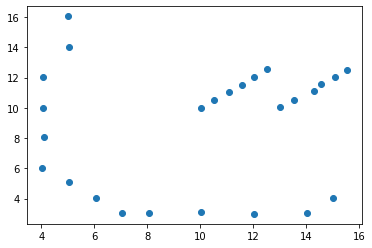

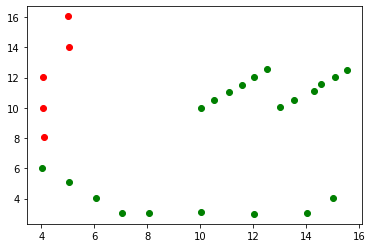

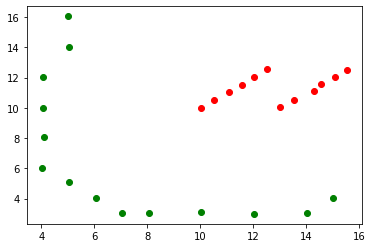

In [21]:


k = 2

class cluster_node:
	def __init__(self, vec, id, left=None, right=None, distance=0.0, node_vector = None):
		self.leftnode = left
		self.rightnode = right
		self.vec = vec
		self.id = id
		self.distance = distance
		if node_vector is None:
			self.node_vector = [self.id]
		else:
			self.node_vector = node_vector[:]

def euclidean_distance(vec1, vec2):
	return np.sqrt(sum((vec1 - vec2) ** 2))

def min_distance(clust1, clust2, distances):
	d = 12123123123123
	for i in clust1.node_vector:
		for j in clust2.node_vector:
			try:
				distance = distances[(i,j)]
			except:
				try:
					distance = distances[(j,i)]
				except:
					distance = euclidean_distance(clust1.vec, clust2.vec)
			if distance < d:
				d = distance
	return d

def agglomerative_clustering(data, distance):
	# cluster the rows of the data matrix
	distances = {}
	currentclustid = -1

	# cluster nodes are initially just the individual rows
	nodes = [cluster_node(np.array(data[i]), id=i) for i in range(len(data))]

	while len(nodes) > k:
		lowestpair = (0,1)
		closest = euclidean_distance(nodes[0].vec,nodes[1].vec)
	
		# loop through every pair looking for the smallest distance
		for i in range(len(nodes)):
			for j in range(i+1,len(nodes)):
				# distances is the cache of distance calculations
				if (nodes[i].id,nodes[j].id) not in distances:
					if distance == "min":
						distances[(nodes[i].id,nodes[j].id)] = min_distance(nodes[i], nodes[j], distances)
					else:
						distances[(nodes[i].id,nodes[j].id)] = euclidean_distance(nodes[i].vec,nodes[j].vec)
		
				d = distances[(nodes[i].id,nodes[j].id)]
		
				if d < closest:
					closest = d
					lowestpair = (i,j)
		
		# calculate the average of the two nodes
		len0 = len(nodes[lowestpair[0]].node_vector)
		len1 = len(nodes[lowestpair[1]].node_vector)
		mean_vector = [(len0*nodes[lowestpair[0]].vec[i] + len1*nodes[lowestpair[1]].vec[i])/(len0 + len1) \
						for i in range(len(nodes[0].vec))]
		
		# create the new cluster node
		new_node = cluster_node(np.array(mean_vector), currentclustid, left = nodes[lowestpair[0]], right = nodes[lowestpair[1]], \
			distance = closest, node_vector = nodes[lowestpair[0]].node_vector + nodes[lowestpair[1]].node_vector)
		
		# cluster ids that weren't in the original set are negative
		currentclustid -= 1
		del nodes[lowestpair[1]]
		del nodes[lowestpair[0]]
		nodes.append(new_node)

	return nodes

def main():
	# Generate data
	# df = pd.read_csv('./segmentation.data.modified')
	centers = [[1, 1], [-1, -1], [1, -1]]
	# X, _ = make_blobs(n_samples = 90, centers = centers, cluster_std = 0.5)
	# df = pd.DataFrame(X) ## convert to DF
   
    
	# Visualize the data
	f = plt.figure(1)
	plt.scatter(df['x'],df['y'])
	f.show()
	colorset = ['red', 'green', 'blue', 'yellow', 'brown', 'orange', 'black']

	data = np.array(df)

	# Average criterion agglomerative clustering
	cluster = agglomerative_clustering(data, "avg")
	# plt.scatter(cluster.leftnode.vec[0], cluster.leftnode.vec[1], color = 'yellow')
	# plt.scatter(cluster.rightnode.leftnode.vec[0], cluster.rightnode.leftnode.vec[1], color = 'red')
	# plt.scatter(cluster.rightnode.rightnode.vec[0], cluster.rightnode.rightnode.vec[1], color = 'green')
	j = 0
	m = plt.figure(2)
	for i in cluster:
		plt.scatter(data[i.node_vector].T[0], data[i.node_vector].T[1], color = colorset[j])
		j += 1
	m.show()

	# Min criterion agglomerative clustering
	g = plt.figure(3)
	cluster = agglomerative_clustering(data, "min")
	# plt.scatter(cluster.leftnode.vec[0], cluster.leftnode.vec[1], color = 'yellow')
	# plt.scatter(cluster.rightnode.leftnode.vec[0], cluster.rightnode.leftnode.vec[1], color = 'red')
	# plt.scatter(cluster.rightnode.rightnode.vec[0], cluster.rightnode.rightnode.vec[1], color = 'green')
	j = 0
	for i in cluster:
		plt.scatter(data[i.node_vector].T[0], data[i.node_vector].T[1], color = colorset[j])
		j += 1
	g.show()
	# raw_input()

if __name__ == '__main__':
	main()

In [9]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples = 90, centers = centers, cluster_std = 0.5)
df = pd.DataFrame(X)
df

,0,1
0,0.727726,1.655894
1,1.423902,0.935712
2,0.535523,0.488886
3,-1.028256,-0.334861
4,-1.796896,-0.093798
...,...,...
85,-1.336117,-1.462070
86,1.939190,0.571979
87,-0.521090,0.058866
88,0.850858,-0.973432


[[0.00000000e+00 0.00000000e+00 3.33333333e-01 9.99900000e+03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99900000e+03
  5.00000000e-01 0.00000000e+00]
 [3.33333333e-01 5.00000000e-01 0.00000000e+00 9.99900000e+03
  0.00000000e+00 5.00000000e-01]
 [9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03
  9.99900000e+03 9.99900000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99900000e+03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.33333333e-01 9.99900000e+03
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 9.99900000e+03 3.33333333e-01 9.99900000e+03
  0.00000000e+00 0.00000000e+00]
 [9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03
  9.99900000e+03 9.99900000e+03]
 [3.33333333e-01 9.99900000e+03 0.00000000e+00 9.99900000e+03
  0.00000000e+00 5.00000000e-01]
 [9.99900000e+03 9.99900000e+03 9.99900000e+03 9.99900000e+03
  9.99900000e+03 9.99900000e+03]
 [0.00000000e+00 9.99900000e+03 0.00000000e+00 9.

c:\Users\Amit\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\cluster\hierarchy.py:2841: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


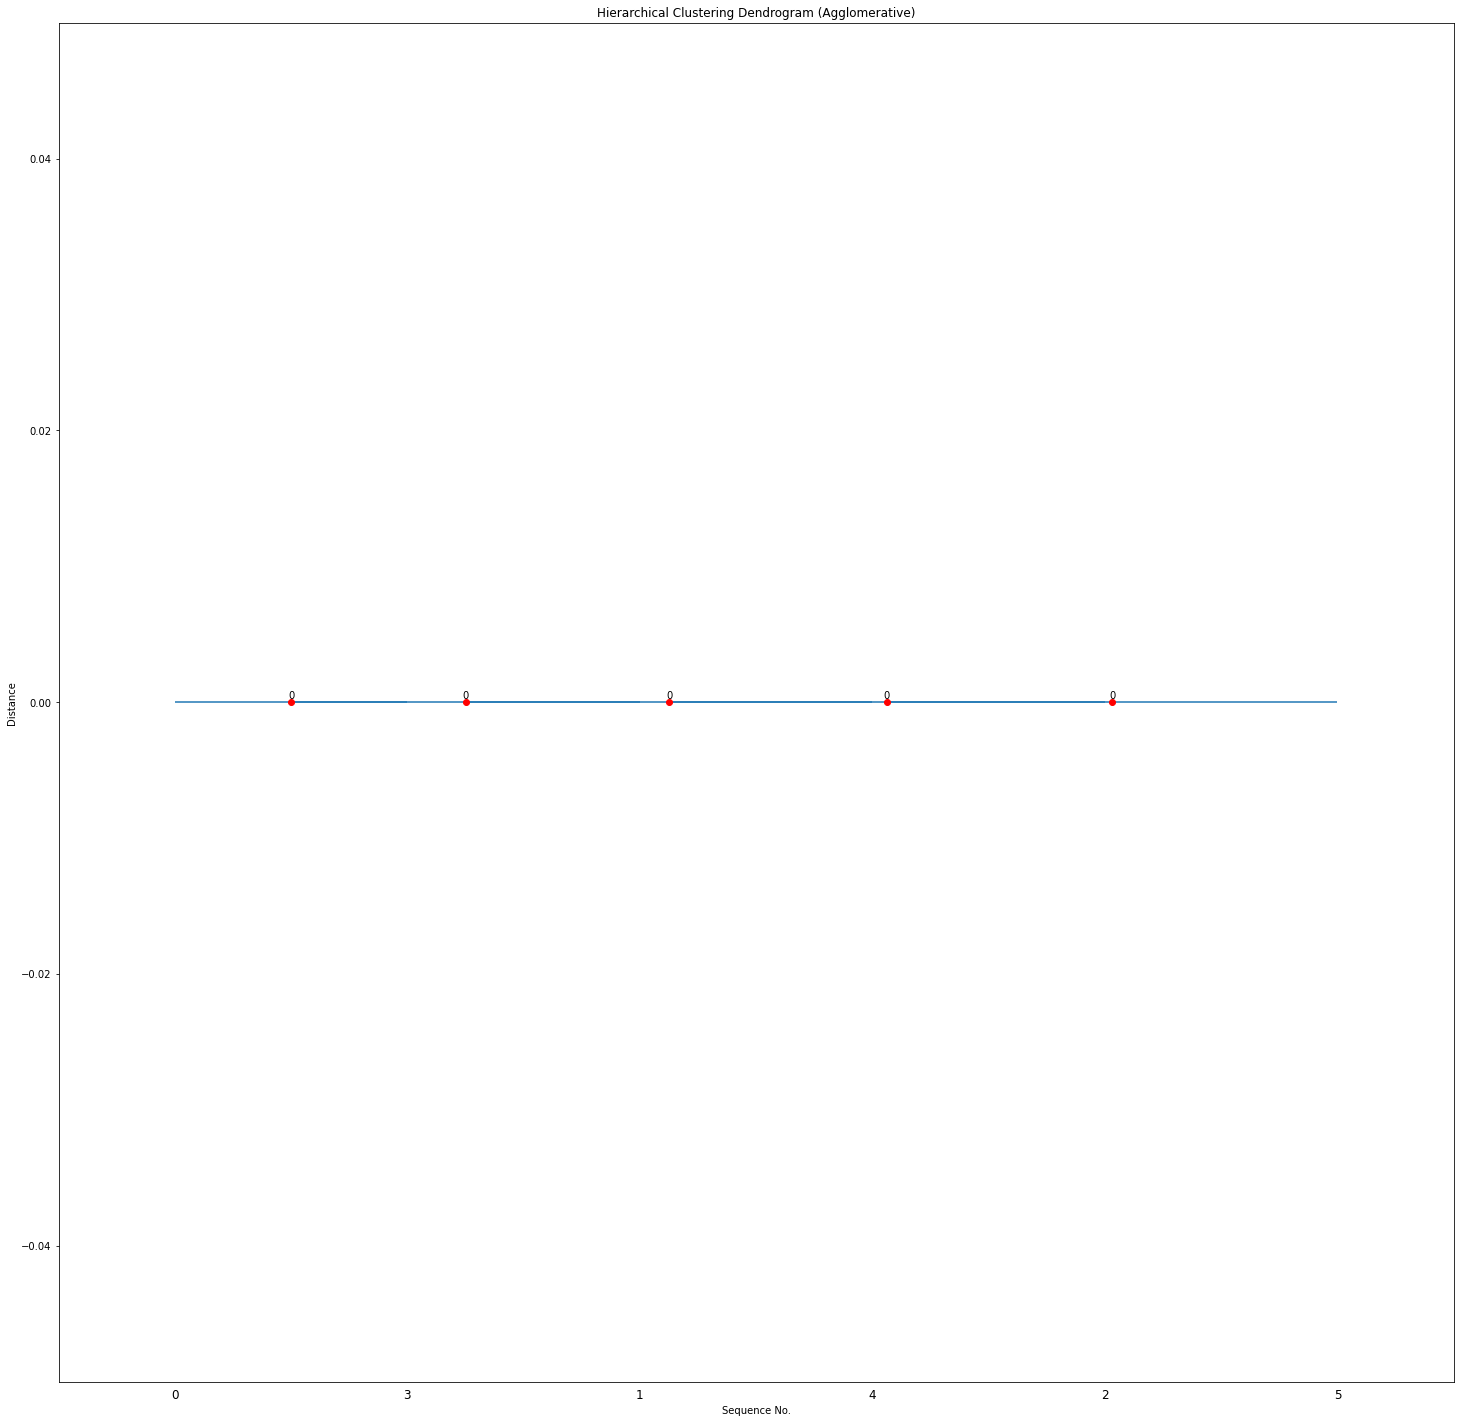

In [25]:
from scipy.cluster import hierarchy
import numpy as np
import scipy
import matplotlib.pyplot as plt
# import distance
import time
		
"""
input: Two numbers
output: Minimum of the two numbers
"""
def minimum(double1,double2):
	if (double1< double2):
		return double1
	else:
		return double2
		
"""
input: Two numbers
output:Maximum of the two numbers
"""
def maximum(double1,double2):
	if (double1>double2):
		return double1
	else:
		return double2

"""
Performs agglomerative clustering
input:	distance matrix,its size and iteration value k
output:	returns the modified distance matrix
"""
def clust(a,size,k):
	min =999.0
	m=555
	n=555
	for i in range(0,size-1):
		for j in range (1,size):
			if (i<j):
				if (a[i][j]<min):
					min = a[i][j]
					m=i
					n=j	
	big_list=[]				
	if(m<n):																#To keep track of the order							
		big_list.append(dict[m])
		big_list.append(dict[n])
		dict[m]=big_list
		del dict[n]		
	#This section of the function is used to fill values in Z			   
	if(new_clusters[m]==-1 and new_clusters[n]==-1):						#both are -1
		Z[k][0]=m
		Z[k][1]=n
		x=minimum(m,n)
		new_clusters[x]=size+k
		Z[k][3]=2
	elif(new_clusters[m]!=-1 and new_clusters[n]!=-1):						#both not -1
		Z[k][0]=new_clusters[m]
		Z[k][1]=new_clusters[n]
		if(m<n):
			new_clusters[m]=size+k
		else:
			new_clusters[n]=size+k
		Z[k][3]=Z[int(maximum(Z[k][0],Z[k][1])-size)][3] + 1
	elif(new_clusters[m]!=-1 and new_clusters[n]==-1):						#m is not -1 and n is -1			
		if(m<n):
			Z[k][0]=new_clusters[m]
			Z[k][1]=n
			Z[k][3]=Z[int(maximum(Z[k][0],Z[k][1])-size)][3] + 1
			new_clusters[m]=size+k
		else:
			Z[k][0]=m
			Z[k][1]=new_clusters[n]
			Z[k][3]=Z[int(maximum(Z[k][0],Z[k][1])-size)][3] + 1
			new_clusters[n]=size+k
	elif(new_clusters[m]==-1 and new_clusters[n]!=-1):						#m is -1 and n is not -1
		if(m<n):
			Z[k][0]=m
			Z[k][1]=new_clusters[n]
			Z[k][3]=Z[int(maximum(Z[k][0],Z[k][1])-size)][3] + 1
			new_clusters[m]=size+k
		else:
			Z[k][0]=new_clusters[m]
			Z[k][1]=n
			Z[k][3]=Z[int(maximum(Z[k][0],Z[k][1])-size)][3] + 1
			new_clusters[n]=size+k
	else:
		print("Error")	
	Z[k][2]=min
	for j in range(0,size):
		if (j!=n):
			a[j][m] = minimum(a[j][m],a[j][n])
		a[m][j] = a[j][m]
		a[j][n] = 9999.0
		a[n][j] = 9999.0	
	return a

"""
This is used to form the dendrogram
"""
def augmented_dendrogram(*args, **kwargs):
	data = scipy.cluster.hierarchy.dendrogram(*args, **kwargs)
	if not kwargs.get('no_plot', False):
		for i, d in zip(data['icoord'], data['dcoord']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			plt.plot(x, y, 'ro')
			plt.annotate("%.3g" % y, (x, y), xytext=(0,12),textcoords='offset points',va='top', ha='center')
	return data
	

#MAIN
# a=np.load('distance_matrix.npy')
a=np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])
size=len(a)
dict={}
Z=np.zeros(shape=(size-1,4))
new_clusters={}
for i in range(0,size):
	list=[]
	list.append(i)
	dict[i]=list
for i in range(0,size):
	new_clusters[i]=-1
start=time.time()
for k in range(0,size-1):
	a = clust(a,size,k)
	print(a)
print("Clustering done\t" + str(time.time()-start))

#Plot dendrogram
names=[i for i in range(0,size)]
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram (Agglomerative)')
plt.xlabel('Sequence No.')
plt.ylabel('Distance')
augmented_dendrogram(Z,labels=names,show_leaf_counts=True,p=25,truncate_mode='lastp')
plt.show()